In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [4]:
df=pd.read_csv("500_Person_Gender_Height_Weight_Index.csv")

In [5]:
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [6]:
df.shape

(500, 4)

In [7]:
df.describe

<bound method NDFrame.describe of      Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]>

In [8]:
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [9]:
gender=LabelEncoder()
df['Gender']=gender.fit_transform(df['Gender'])

In [11]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,4
1,1,189,87,2
2,0,185,110,4
3,0,195,104,3
4,1,149,61,3


In [13]:
bins=(-1,0,1,2,3,4,5)
health=['malnourished','underweight','fit','slightly overweight', 'overweight','extremely overweight']
df['Index']=pd.cut(df['Index'],bins=bins,labels=health)

In [15]:
df['Index'].value_counts()

extremely overweight    198
overweight              130
fit                      69
slightly overweight      68
underweight              22
malnourished             13
Name: Index, dtype: int64

In [16]:
df['Gender'].value_counts()

0    255
1    245
Name: Gender, dtype: int64

In [17]:
df.head()

,Gender,Height,Weight,Index
0,1,174,96,overweight
1,1,189,87,fit
2,0,185,110,overweight
3,0,195,104,slightly overweight
4,1,149,61,slightly overweight


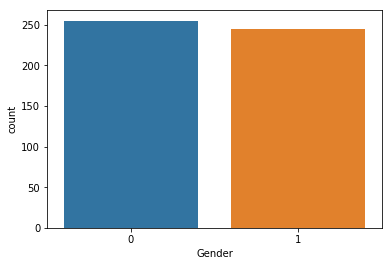

In [18]:
sns.countplot(df['Gender'])

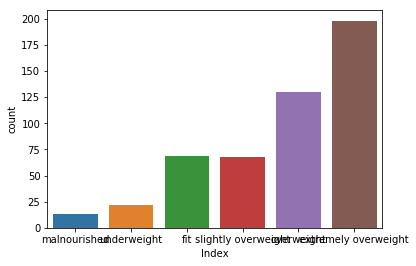

In [26]:
sns.countplot(df['Index'])

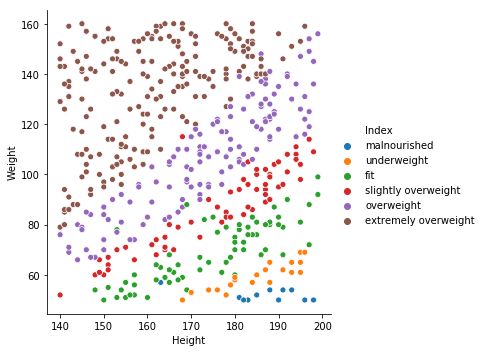

In [23]:
sns.relplot(x='Height',y='Weight',hue='Index',data=df)

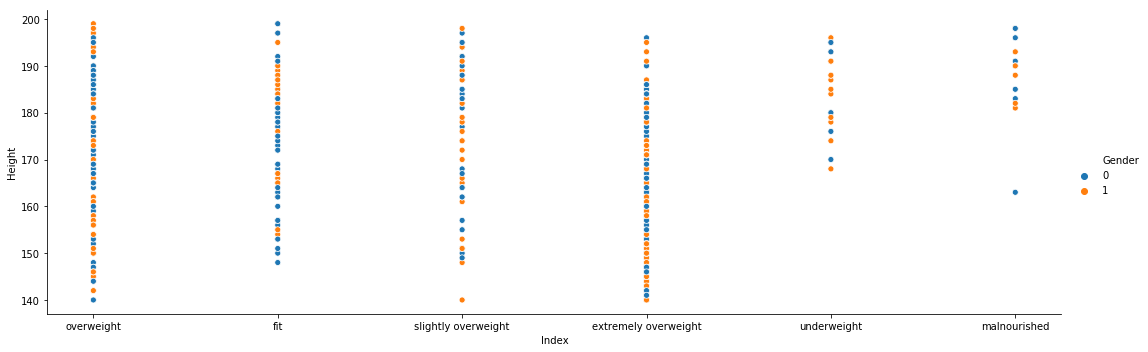

In [27]:
sns.relplot(x='Index',y='Height',hue='Gender',data=df,height=5,aspect=3)

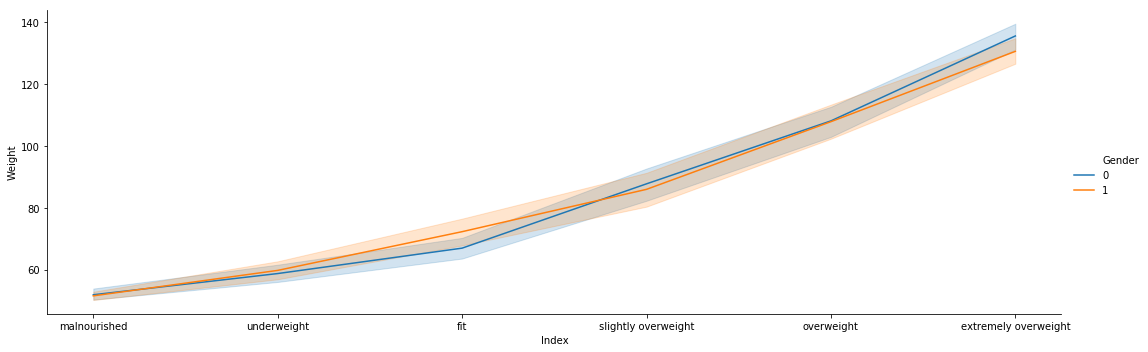

In [31]:
sns.relplot(x='Index',y='Weight',hue='Gender',kind='line',data=df,height=5,aspect=3)

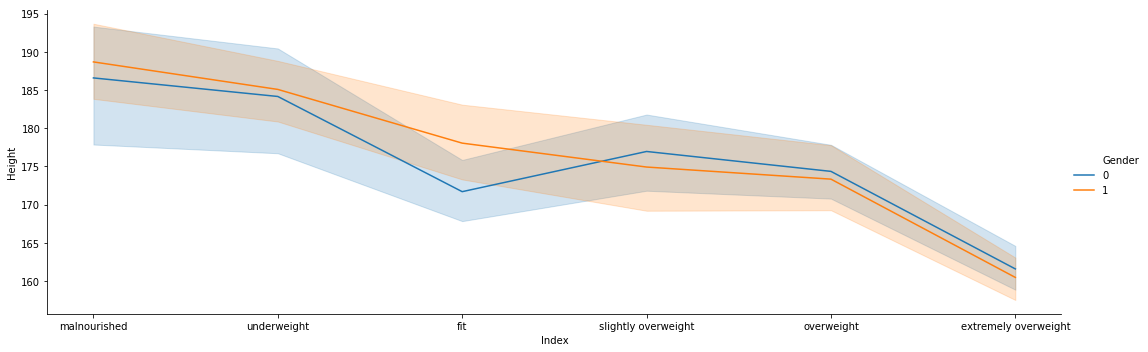

In [32]:
sns.relplot(x='Index',y='Height',hue='Gender',kind='line',data=df,height=5,aspect=3)

In [35]:
X=df.drop('Index',axis=1)
y=df['Index']

In [36]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [37]:
s=StandardScaler()
X_train=s.fit_transform(X_train)
X_test=s.transform(X_test)

C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [38]:
clf=svm.SVC()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)

In [40]:
print(classification_report(y_test,pred))

                      precision    recall  f1-score   support

extremely overweight       0.88      0.97      0.92        36
                 fit       0.73      0.80      0.76        10
        malnourished       0.00      0.00      0.00         3
          overweight       0.96      0.78      0.86        32
 slightly overweight       0.78      0.93      0.85        15
         underweight       0.60      0.75      0.67         4

           micro avg       0.85      0.85      0.85       100
           macro avg       0.66      0.71      0.68       100
        weighted avg       0.84      0.85      0.84       100



C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Udhhav Arora\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [41]:
print(confusion_matrix(y_test,pred))

[[35  0  0  1  0  0]
 [ 0  8  0  0  2  0]
 [ 0  1  0  0  0  2]
 [ 5  0  0 25  2  0]
 [ 0  1  0  0 14  0]
 [ 0  1  0  0  0  3]]


In [42]:
print(accuracy_score(y_test,pred))

0.85


In [56]:
a=[[0,167.64,63.5]]
a=s.transform(a)
b=clf.predict(a)

In [57]:
print(b)

['fit']
